In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv('final.csv')
from sklearn.utils import shuffle
df = shuffle(df)
df = df.head(2000)
df.describe()

,Unnamed: 0
count,2000.000000
mean,4978.720500
std,2838.865462
min,7.000000
25%,2520.500000
50%,5032.500000
75%,7357.750000
max,9911.000000


In [39]:
text_data = df['title'].values
label = df['label']

temp = df['label'].value_counts()
import numpy as np
np.mean(temp)
temp
print(np.mean(temp))

400.0


In [40]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
# do the lebel part
encoder = LabelEncoder()
y = encoder.fit_transform(label.astype(str))
print(encoder.classes_)


# Handle Input text data
from sklearn.preprocessing import OneHotEncoder
cv = HashingVectorizer(n_features=5000)

# pipeline = Pipeline([

#     ('tfidf', cv)

#  ])

X = cv.transform(text_data).toarray()
np.shape(X)


['adult_videos' 'animation_videos' 'education_videos' 'kid_videos'
 'sports_videos']


(2000, 5000)

(array([358.,   0., 439.,   0.,   0., 426.,   0., 377.,   0., 400.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

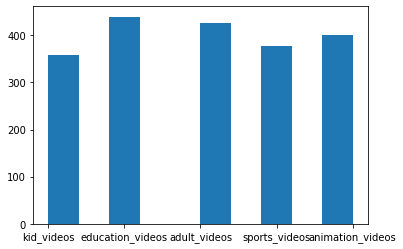

In [41]:
import matplotlib.pyplot as plt

plt.hist(label)

In [42]:
import pickle
with open("vocab.pkl", 'wb') as handle:
        pickle.dump(cv, handle)

# Using PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = []

X_pca = pca.fit_transform(X)

np.shape(X_pca)

(2000, 597)

# Train Model

In [8]:
#Sample
import matplotlib.pyplot as plt
X_mini = X
X_mini_PCA=X
y_mini = y

plt.hist(y)
plt.plot()

[]

## SGDClassifier  ( 88%)

full dataset

clf = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
# clf.fit(X, y)

from sklearn.model_selection import cross_val_score

temp = (cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
np.mean(temp)


0.8225203004219631

In [146]:
clf = SGDClassifier(random_state=42)
#,learning_rate='adaptive',eta0=2
param_grid = [
            {
                'max_iter':list(range(1000,1000000,1000)),
           'alpha':  [0.1,.01,0.001,.0001,.00001]   } 
             ]

grid_search = GridSearchCV(clf, param_grid,scoring='accuracy',return_train_score=True)
grid_search.fit(X, y)


from sklearn.model_selection import cross_val_score
temp = cross_val_score(grid_search, X, y, cv=3, scoring="accuracy")
print(temp)
print(np.mean(temp))

C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed

[0.77227723 0.745      0.74747475]
0.7549173250658399


C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [147]:
grid_search.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
grid_search.best_params_

{'alpha': 0.01, 'max_iter': 1000}

## svm  (80%)

dataset 600


In [47]:
from sklearn import svm
clf = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

temp = cross_val_score(clf, X_pca, y, cv=5, scoring="accuracy")
print(temp)
print(np.mean(temp))

[0.8159204  0.82543641 0.8275     0.81453634 0.84924623]
0.8265278757990832


In [162]:
from sklearn.model_selection import GridSearchCV
param_grid = [
                {'C':list(range(1,100)),
                 'kernel' : ['linear','poly', 'rbf', 'sigmoid'] ,
                'degree':list(range(1,10))
                }
             
             ]

grid_search = GridSearchCV(clf, param_grid,scoring='accuracy',return_train_score=True)
grid_search.fit(X_mini, y_mini)
from sklearn.model_selection import cross_val_score
temp = cross_val_score(grid_search, X_mini, y_mini, cv=5, scoring="accuracy")
print(temp)
print(np.mean(temp))

C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed

[0.78688525 0.71666667 0.75833333 0.78151261 0.78151261]
0.7649820911971346


C:\Users\BC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [163]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Dicision Tree

In [48]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42 , min_samples_leaf=10)
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X_pca, y, cv=5, scoring="accuracy"))

0.6465567048177199

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42 )

param_grid = [
             {'min_samples_leaf': list(range(1,100)),
              'max_depth':list(range(1,100))}
            ]

grid_search = GridSearchCV(clf, param_grid,scoring='accuracy',return_train_score=True)
grid_search.fit(  X_mini_PCA, y_mini)
np.mean(cross_val_score(grid_search,  X_mini_PCA, y_mini, cv=3, scoring="accuracy"))

In [171]:
grid_search.best_params_

{'max_depth': 86, 'min_samples_leaf': 1}

# MultinomialNB

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
clf = MultinomialNB()
clf.fit(abs(X), y)
np.mean(cross_val_score(clf,  abs(X), y, cv=5, scoring="accuracy"))


0.8060026939681706

# LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
param_grid = [
             {
                    'max_iter': list(range(1000,100000,10000)),
                  'solver': ['lbfgs', 'liblinear' ,'sag','saga']
             }
            ]

grid_search = GridSearchCV(clf, param_grid,scoring='accuracy',return_train_score=True)
grid_search.fit(  X_mini_PCA, y_mini)
np.mean(cross_val_score(grid_search,  X_mini_PCA, y_mini, cv=3, scoring="accuracy"))


NameError: name 'GridSearchCV' is not defined

In [193]:
grid_search.best_params_

{'max_iter': 1000, 'solver': 'lbfgs'}

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter= 1000, solver= 'lbfgs')
np.mean(cross_val_score(clf,  X_pca, y, cv=5, scoring="accuracy"))

C:\Users\BC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\BC\Anaconda3\lib\site-packages\sklearn\

0.8210078815500472